# グラフ

## 扱うデータセット
- 人工的なデータ（データに意味はない，定義確認用の小さいグラフ）
- 空手クラブ（小規模な社会ネットワーク; 無向グラフ）
- 名古屋市地下鉄（小規模なネットワーク; 無向グラフ）
- プログラミング言語ネットワーク（中規模のネットワーク; 有向グラフ-> 無向グラフにする？）

In [43]:
import numpy as np
import json
import networkx as nx

%matplotlib inline

In [5]:
try:
    res = requests.get('https://exploring-data.com/gexf/plin_forceatlas2.json')
    d = json.loads(res.text)
except:
    import os
    if not os.path.exists('data/plin_forceatlas2.json'):
        # Exploring Dataのサイトで使用されているデータを取得
        # URL: https://exploring-data.com/vis/programming-languages-influence-network/
        !wget -P data https://exploring-data.com/gexf/plin_forceatlas2.json

    with open('data/plin_forceatlas2.json') as f:
        d = json.load(f)

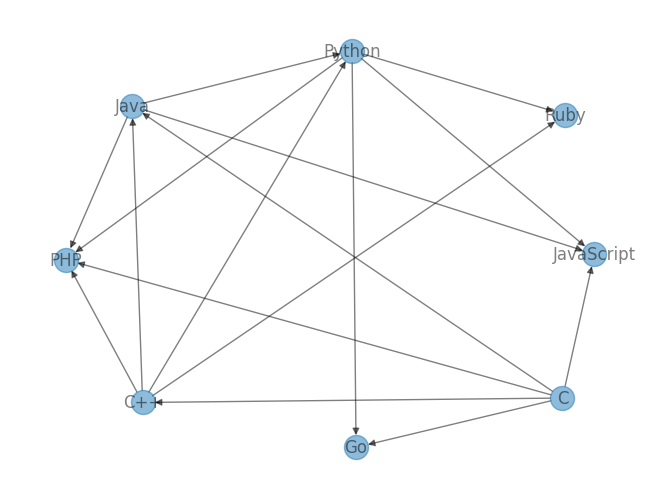

In [24]:
# from https://madnight.github.io/githut/#/pull_requests/2024/1
POPULAR_LANGUAGES = [
    # Top 10
    'Python', 'Java', 'Go', 'JavaScript', 'C++',
    #'TypeScript',
    'PHP', 'Ruby', 'C', 'C#',
    # Top 20
    'Nix', 'Shell', 'Rust', 'Scala', 'Kotlin',
    'Swift', 'Dart', 'Groovy', 'Perl', 'Lua',
    # Top 30
    'DM', 'SystemVerilog', 'Objective-C', 'Elixir', 'CodeQL',
    'OCaml', 'Haskell', 'PowerShell', 'Erlang', 'Emacs Lisp',
    # Top 33
    'Julia', 'Clojure', 'R'
]

G_lang = nx.DiGraph()

id2name = {}
for node in d['nodes']:
    if 'paradigms' in node['attributes']:
        id = node['id']
        node_name = node['label']
        id2name[id] = node_name
        paradigms = node['attributes']['paradigms'].split('|')
        G_lang.add_node(node_name, paradigm=paradigms)


edges = []
for edge in d['edges']:
    if edge['sourceID'] in id2name and edge['targetID'] in id2name:
        source = id2name[edge['sourceID']]
        target = id2name[edge['targetID']]
        # source が target に影響を与えた（i.e. targetはsourceに影響を受けた言語）
        edges.append((source, target))
        
G_lang.add_edges_from(edges)
G_lang = G_lang.subgraph(POPULAR_LANGUAGES[:8])

pos = nx.spring_layout(G_lang, k=8.0)
nx.draw(G_lang, pos, with_labels=True, alpha=0.5) 

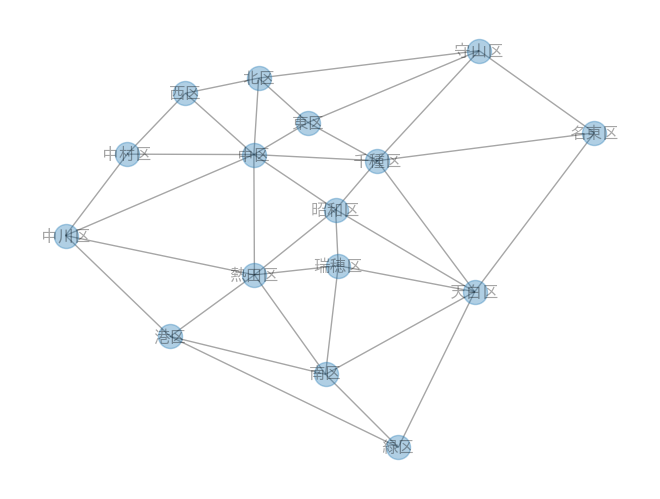

In [27]:
wards = [
    '西区',
    '北区',
    '守山区',
    '中村区',
    '中区',
    '東区',
    '千種区',
    '名東区',
    '中川区',
    '熱田区',
    '昭和区',
    '瑞穂区',
    '天白区',
    '港区',
    '南区',
    '緑区',
]

adjacencies = [
    ('西区', '北区'),
    ('西区', '中村区'),
    ('西区', '中区'),
    ('北区', '西区'),  
    ('北区', '中区'),
    ('北区', '東区'),
    ('北区', '守山区'),
    ('守山区', '北区'),
    ('守山区', '東区'),
    ('守山区', '千種区'),
    ('守山区', '名東区'),
    ('中村区', '中川区'),
    ('中村区', '西区'),
    ('中村区', '中区'),
    ('中区', '北区'),
    ('中区', '西区'),
    ('中区', '中村区'),
    ('中区', '中川区'),
    ('中区', '熱田区'),
    ('中区', '昭和区'),
    ('中区', '千種区'),
    ('中区', '東区'),
    ('東区', '北区'),
    ('東区', '中区'),
    ('東区', '千種区'),
    ('東区', '守山区'),
    ('千種区', '守山区'),
    ('千種区', '東区'),
    ('千種区', '中区'),
    ('千種区', '昭和区'),
    ('千種区', '天白区'),
    ('千種区', '名東区'),
    ('名東区', '守山区'),
    ('名東区', '千種区'),
    ('名東区', '天白区'),
    ('中川区', '中村区'),
    ('中川区', '中区'),
    ('中川区', '熱田区'),
    ('中川区', '港区'),
    ('熱田区', '中区'),
    ('熱田区', '中川区'),
    ('熱田区', '港区'),
    ('熱田区', '南区'),
    ('熱田区', '瑞穂区'),
    ('熱田区', '昭和区'),
    ('昭和区', '千種区'),
    ('昭和区', '中区'),
    ('昭和区', '熱田区'),
    ('昭和区', '瑞穂区'),
    ('昭和区', '天白区'),
    ('瑞穂区', '昭和区'),
    ('瑞穂区', '熱田区'),
    ('瑞穂区', '南区'),
    ('瑞穂区', '天白区'),
    ('天白区', '名東区'),
    ('天白区', '千種区'),
    ('天白区', '昭和区'),
    ('天白区', '瑞穂区'),
    ('天白区', '南区'),
    ('天白区', '緑区'),
    ('港区', '中川区'),
    ('港区', '熱田区'),
    ('港区', '南区'),
    ('南区', '港区'),
    ('南区', '熱田区'),
    ('南区', '瑞穂区'),
    ('南区', '天白区'),
    ('南区', '緑区'),
    ('緑区', '港区'),
    ('緑区', '天白区'),
]

G = nx.Graph()
G.add_nodes_from(wards)
G.add_edges_from(adjacencies)

pos = {
    '西区': [136.890058, 35.189109],
    '北区': [136.911558, 35.194169],
    '守山区': [136.97633, 35.203343],
    '中村区': [136.872944, 35.16874],
    '中区': [136.910156, 35.168607],
    '東区': [136.926043, 35.179314],
    '千種区': [136.9464, 35.166534],
    '名東区': [137.010239, 35.175862],
    '中川区': [136.854816, 35.141539],
    '熱田区': [136.910317, 35.128372],
    '昭和区': [136.934166, 35.150216],
    '瑞穂区': [136.934953, 35.131439],
    '天白区': [136.975049, 35.12274],
    '港区': [136.885553, 35.107792],
    '南区': [136.931212, 35.095127],
    '緑区': [136.952602, 35.070721],
}
nx.draw(G, pos, with_labels=True, alpha=0.35, font_family='IPAPGothic') 

--- 

## グラフのデータ構造


### ノード

In [28]:
V = list(G.nodes)
V

['西区',
 '北区',
 '守山区',
 '中村区',
 '中区',
 '東区',
 '千種区',
 '名東区',
 '中川区',
 '熱田区',
 '昭和区',
 '瑞穂区',
 '天白区',
 '港区',
 '南区',
 '緑区']

In [29]:
node2id = {}
id2node = {}

for idx, node in enumerate(V):
    node2id[node] = idx
    id2node[idx] = node
    print(idx, node)

0 西区
1 北区
2 守山区
3 中村区
4 中区
5 東区
6 千種区
7 名東区
8 中川区
9 熱田区
10 昭和区
11 瑞穂区
12 天白区
13 港区
14 南区
15 緑区


### エッジ

In [31]:
E = set(G.edges)
E

{('中区', '中川区'),
 ('中区', '千種区'),
 ('中区', '昭和区'),
 ('中区', '東区'),
 ('中区', '熱田区'),
 ('中川区', '港区'),
 ('中川区', '熱田区'),
 ('中村区', '中区'),
 ('中村区', '中川区'),
 ('北区', '中区'),
 ('北区', '守山区'),
 ('北区', '東区'),
 ('千種区', '名東区'),
 ('千種区', '天白区'),
 ('千種区', '昭和区'),
 ('南区', '緑区'),
 ('名東区', '天白区'),
 ('天白区', '南区'),
 ('天白区', '緑区'),
 ('守山区', '千種区'),
 ('守山区', '名東区'),
 ('守山区', '東区'),
 ('昭和区', '天白区'),
 ('昭和区', '瑞穂区'),
 ('東区', '千種区'),
 ('港区', '南区'),
 ('港区', '緑区'),
 ('熱田区', '南区'),
 ('熱田区', '昭和区'),
 ('熱田区', '港区'),
 ('熱田区', '瑞穂区'),
 ('瑞穂区', '南区'),
 ('瑞穂区', '天白区'),
 ('西区', '中区'),
 ('西区', '中村区'),
 ('西区', '北区')}

In [32]:
# エッジの番号表示
for _from, _to in E:
    print(node2id[_from], node2id[_to])

1 2
1 5
9 11
12 14
14 15
13 15
4 8
4 5
10 11
9 14
2 6
4 10
8 13
3 8
1 4
12 15
11 14
6 12
5 6
6 10
2 5
9 10
11 12
8 9
10 12
0 1
0 3
0 4
3 4
9 13
4 9
13 14
6 7
7 12
4 6
2 7


In [34]:
# エッジの行列表現: 隣接行列（行がfrom，列がtoに対応）
A = nx.adjacency_matrix(G).todense()
A

array([[0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0]])

$m$行目の各数字はノード$m$から1ステップで到達できるノード番号を意味する．つまり1ステップ後にどこにいるかという意味．
$n$列目の各数字はノード$n$へ1ステップで到達できるノード番号を意味する．

ということは隣接行列$A$のべき乗$A^n$で$(i, j)$の正の場合，ノード$i$からは$j$には$n$ステップ後に到達できることを意味する．
上記の例で$A^3$は

In [62]:
np.linalg.matrix_power(A, 3) # np.dot(np.dot(A, A), A)と等価

array([[ 4,  8,  4,  7, 12,  5,  6,  2,  4,  5,  4,  2,  2,  3,  1,  0],
       [ 8,  6, 10,  4, 15, 10,  7,  4,  5,  4,  6,  2,  5,  2,  1,  0],
       [ 4, 10,  6,  4,  7, 10, 13,  8,  3,  4,  7,  3,  4,  0,  2,  2],
       [ 7,  4,  4,  4, 12,  5,  4,  1,  8,  5,  5,  3,  2,  3,  3,  1],
       [12, 15,  7, 12, 16, 15, 18,  7, 14, 17, 16,  7,  8,  5,  8,  5],
       [ 5, 10, 10,  5, 15,  8, 13,  5,  4,  5,  6,  4,  6,  2,  2,  1],
       [ 6,  7, 13,  4, 18, 13, 12, 10,  5,  8, 14,  7, 14,  5,  7,  3],
       [ 2,  4,  8,  1,  7,  5, 10,  4,  1,  5,  5,  4, 10,  2,  3,  2],
       [ 4,  5,  3,  8, 14,  4,  5,  1,  6, 12,  6,  6,  7,  9,  5,  3],
       [ 5,  4,  4,  5, 17,  5,  8,  5, 12, 12, 15, 13, 10, 12, 15,  7],
       [ 4,  6,  7,  5, 16,  6, 14,  5,  6, 15, 10, 12, 15,  8,  8,  6],
       [ 2,  2,  3,  3,  7,  4,  7,  4,  6, 13, 12,  8, 13,  7, 12,  6],
       [ 2,  5,  4,  2,  8,  6, 14, 10,  7, 10, 15, 13, 10,  6, 14, 10],
       [ 3,  2,  0,  3,  5,  2,  5,  2,  9, 12,  8,

$A^3$において正の値を1に置換した行列は

In [63]:
R = np.linalg.matrix_power(A, 3) # np.dot(np.dot(A, A), A)と等価
R[R >= 1] = 1
R

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

## グラフの基礎特徴量

### ノード数

In [35]:
node_num = len(G.nodes)
node_num

16

### エッジ数

In [36]:
edge_num = len(G.edges)
edge_num

36

### 密度
グラフの密度（density）とは，グラフ中のノード間に張ることのできるすべての辺に対する，実際の辺の数の割合である．
グラフ$G$のノード数を$n$，存在するエッジの数を$m$としたとき，Gの密度density$は

\begin{equation}
density=\frac{m}{n(n-1)/2}
=\frac{2m}{n(n-1)}
\end{equation}

密度が1のとき，グラフ中の全ノード間にエッジが張られている状態になる．このようなグラフを**完全グラフ**と呼ぶ．

### 距離
グラフ中のあるノードからあるノードへ最短で到達するための辺の数を最短距離，あるいは単に距離（distance）と呼ぶ．
ノード$i$とノード$j$間の距離は$d_{i, j}$のような記号で表記されることがある．
グラフ$G$に属するすべてのノード間の距離を行列表記したものを距離行列と呼ぶ．

In [48]:
D = np.zeros((16, 16), dtype=int)
for _from, _dists in nx.all_pairs_shortest_path_length(G):
    node2id[_from]
    for _to, dist in _dists.items():
        D[node2id[_from], node2id[_to]] = dist

D

array([[0, 1, 2, 1, 1, 2, 2, 3, 2, 2, 2, 3, 3, 3, 3, 4],
       [1, 0, 1, 2, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4],
       [2, 1, 0, 3, 2, 1, 1, 1, 3, 3, 2, 3, 2, 4, 3, 3],
       [1, 2, 3, 0, 1, 2, 2, 3, 1, 2, 2, 3, 3, 2, 3, 3],
       [1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 3],
       [2, 1, 1, 2, 1, 0, 1, 2, 2, 2, 2, 3, 2, 3, 3, 3],
       [2, 2, 1, 2, 1, 1, 0, 1, 2, 2, 1, 2, 1, 3, 2, 2],
       [3, 2, 1, 3, 2, 2, 1, 0, 3, 3, 2, 2, 1, 3, 2, 2],
       [2, 2, 3, 1, 1, 2, 2, 3, 0, 1, 2, 2, 3, 1, 2, 2],
       [2, 2, 3, 2, 1, 2, 2, 3, 1, 0, 1, 1, 2, 1, 1, 2],
       [2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 0, 1, 1, 2, 2, 2],
       [3, 3, 3, 3, 2, 3, 2, 2, 2, 1, 1, 0, 1, 2, 1, 2],
       [3, 3, 2, 3, 2, 2, 1, 1, 3, 2, 1, 1, 0, 2, 1, 1],
       [3, 3, 4, 2, 2, 3, 3, 3, 1, 1, 2, 2, 2, 0, 1, 1],
       [3, 3, 3, 3, 2, 3, 2, 2, 2, 1, 2, 1, 1, 1, 0, 1],
       [4, 4, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0]])

### 中心
中心の定義には離心数を定義する必要がある．
離心数（eccentricity）とは，あるノードから他のノードへの距離の最大値．

In [57]:
nx.eccentricity(G)

{'西区': 4,
 '北区': 4,
 '守山区': 4,
 '中村区': 3,
 '中区': 3,
 '東区': 3,
 '千種区': 3,
 '名東区': 3,
 '中川区': 3,
 '熱田区': 3,
 '昭和区': 2,
 '瑞穂区': 3,
 '天白区': 3,
 '港区': 4,
 '南区': 3,
 '緑区': 4}

### グラフの直径，半径

In [64]:
nx.diameter(G)

4

## 中心性
中心性（centrality）とは，あるノード$n$がグラフ$G$における「位置づけ」を定量化した値である．
「位置づけ」には様々な定義が考えられる．
以下は代表的な中心性である：

- 離心中心性
- 近接中心性
- 次数中心性
- 媒介中心性
- 固有ベクトル中心性
- PageRank（有向グラフで利用）
- 情報中心性

中心性はグラフ分析において頻繁に用いられる指標の1つである．


### 離心中心性

In [65]:
nx.eccentricity(G)

{'西区': 4,
 '北区': 4,
 '守山区': 4,
 '中村区': 3,
 '中区': 3,
 '東区': 3,
 '千種区': 3,
 '名東区': 3,
 '中川区': 3,
 '熱田区': 3,
 '昭和区': 2,
 '瑞穂区': 3,
 '天白区': 3,
 '港区': 4,
 '南区': 3,
 '緑区': 4}